# K-Means法をスクラッチで実装

K-Means法は、初期値に依存するため、偏ったクラスタリングをしてしまう問題があるが、<br>
偏った場合はリトライするようオリジナルのアルゴリズムに改良

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## ダミーデータ作成

In [2]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance,covariance],
           [covariance,variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

In [3]:
cluster1 = generate_2dim_normal(mean = [0, 8], variance=1, covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean = [-1, 0], variance=1, covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean = [10, 10], variance=1, covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean = [5, 5.5], variance=0.8, covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

Text(0,0.5,'x2')

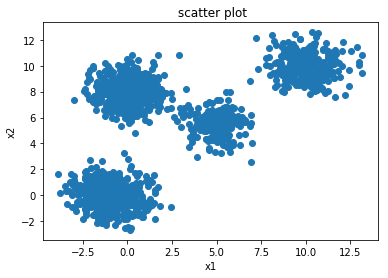

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data[:,0], data[:,1])
ax.set_title(u" scatter plot")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

# K-Means法の実装

In [5]:
# それぞれのデータとシードの値の距離を計算
def get_cluster_id_by_euclidian_distance(data, center):

    #まずデータ点 x シードの数の全て0の行列を用意しておきます
    result = np.zeros([len(data), len(center)])

    #シードごとに、各データ点との距離を計算し、resultに格納します
    for i in range(len(center)):
        square_total = ((data - center[i])**2).sum(axis=1)
        euclidian_distance = np.sqrt(square_total)
        result[:, i] = euclidian_distance

    #一番近いシード番号を取得します。
    cluster_labels = result.argmin(axis=1)
    return cluster_labels


# 割り付けたクラスターごとに平均を計算
def update_center(prev_center, cluster_labels):
    new_center = np.zeros(prev_center.shape)
    for i in range(cluster_num):
        new_center[i, :] = data[cluster_labels==i].mean(axis=0)
    return new_center


# 可視化
def cluter_visualize(data, cluster_labels):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
    cluster_ids = list(set(cluster_labels))
    for k in range(len(cluster_ids)):
        cluster_id = cluster_ids[k]
        label_ = "clutser = %d"%cluster_id
        data_by_cluster = data[cluster_labels == cluster_id]
        ax.scatter(data_by_cluster[:,0], data_by_cluster[:,1], c=colorlist[k], label = label_)

    ax.set_title(u"Clustering")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend(loc='lower right')

#Kmeans法
def Kmeans(data, cluster_num, max_iter,log):

    # 最初のシード
    seed_idx = np.random.randint(len(data), size=cluster_num)
    init_center = data[seed_idx] 
    # print("最初のシード")

    for i in range(max_iter):
        '''2)各データと各シードを比較し、最も近いシードと同じクラスターに分類します'''
        # クラスター番号を取得
        cluster_labels = get_cluster_id_by_euclidian_distance(data, init_center)

        '''3)k個のクラスターそれぞれで重心を求め、それを新たなシードとして更新します'''
        # 新たなシードとして更新
        new_center = update_center(prev_center=init_center, cluster_labels=cluster_labels)
        
        # 更新前後のシードの距離の推移
        distance = np.sqrt(np.sum((new_center - init_center)**2))
        #ログを出力するかどうか
        if log:
            print("distance is %.3f" % (distance))
        
        # 新たなシードを
        init_center = new_center
        
    # 更新後のクラスター番号
    updated_cluster_labels = get_cluster_id_by_euclidian_distance(data, new_center)
    
    return data, updated_cluster_labels
    cluter_visualize(data, updated_cluster_labels)

#オリジナルのKmeans法
def myKmeans(data,cluster_num,max_iter,log,cnt,max_retry):
    for v in range(max_retry):
        data, updated_cluster_labels = Kmeans(data, cluster_num, max_iter,log)

        # retry終了条件準備
        cluster_cnt = []
        for v in range(cluster_num):
            cluster_cnt.append(sum(updated_cluster_labels==v)) 

        # retry終了条件（各クラスタのデータ数がcnt以下）を満たしていれば、break
        cluster_cnt = np.array(cluster_cnt)
        if np.all(cluster_cnt < cnt):
            break

        #ログを出力するかどうか
        if log:
            # 条件満たしてなければ、各クラスタの対象数を出力して、retry
            print("▼retry",cluster_cnt,"※over%d"%cnt)        

    cluter_visualize(data, updated_cluster_labels)

### 普通のK-Means法を実行

初期値に依存するアルゴリズムのため、10回に１回くらい、偏ったクラスタリングをしてしまう

distance is 2.441
distance is 0.695
distance is 0.438
distance is 0.228
distance is 0.125
distance is 0.070
distance is 0.025
distance is 0.021
distance is 0.029
distance is 0.018


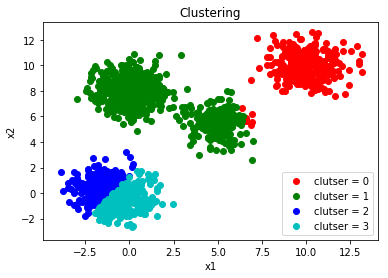

In [6]:
#パラメータをセット
data = data
cluster_num = 4
max_iter = 10
log = True #ログを出力する場合はTrue、出力しない場合はFalse

#実行
data, updated_cluster_labels = Kmeans(data,cluster_num,max_iter,log)
cluter_visualize(data, updated_cluster_labels)

### オリジナルのK-Means法を実行

初期値依存の問題を解決するため、偏ったクラスタリングをした時は、リトライするアルゴリズムに改良

distance is 4.833
distance is 0.577
distance is 0.167
distance is 0.107
distance is 0.050
distance is 0.051
distance is 0.035
distance is 0.016
distance is 0.011
distance is 0.000
▼retry [198 158 148 996] ※over550
distance is 5.627
distance is 1.755
distance is 0.031
distance is 0.000
distance is 0.000
distance is 0.000
distance is 0.000
distance is 0.000
distance is 0.000
distance is 0.000


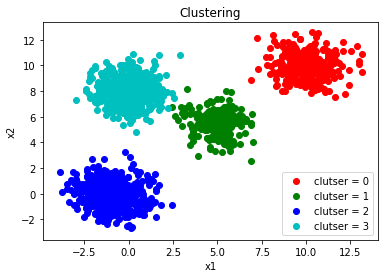

In [9]:
# オリジナルのKeans法を実行

#パラメータをセット
data = data
cluster_num = 4
max_iter = 10
log = True #ログを出力する場合はTrue、出力しない場合はFalse
cnt = 550 #偏ったクラスタがないか判断する域値（例：cnt=550 クラスタ内でデータ数が550以内ならOK）
max_retry = 10 #リトライする回数（最大）

#実行
myKmeans(data,cluster_num,max_iter,log,cnt,max_retry)